<a href="https://colab.research.google.com/github/mrenrique/projects/blob/main/posts/making-a-word-cloud-by-scraping-an-article/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TL;DR 🤓

Have you ever crossed some blog post, video or presentation having A fun way to show & analize which are the most relevant topics(repeated words) on a text. Bellow I show you some examples whe can create, it's like art made out of words 🎨

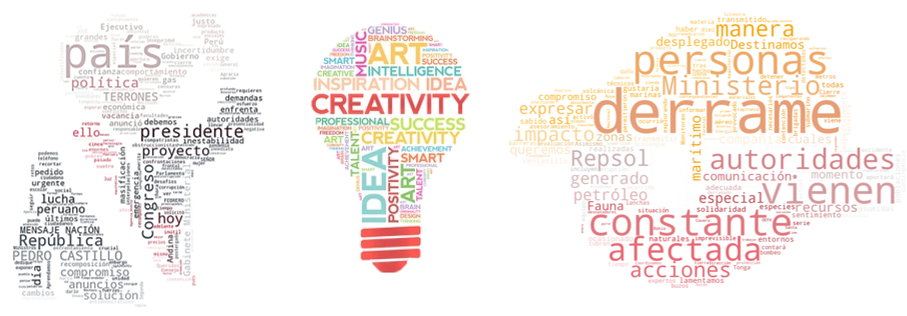

## Installing Libraries ✔️

First, you need to install all libraries you'll be using.

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install newspaper3k
!pip install pillow
!pip install wordcloud
!pip install nltk

print('Library installation Done!')

     |████████████████████████████████| 211 kB 7.6 MB/s 
     |████████████████████████████████| 81 kB 10.0 MB/s 
     |████████████████████████████████| 7.4 MB 60.7 MB/s 
     |████████████████████████████████| 87 kB 5.8 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=73e9156b3836ce85dc512439196c449be3d5d33749708372688c3f5d99f1a059
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=fe3990b9a89a29307f18a4767d156083b809112c9ca71e5ef2bbb556ddbd874e
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=86ab131c0f61eeaef932b8967c1915eaaabc4a1089ea070652c21631f839e9b4
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a59795743

## Importing Libraries 🧰

In [ ]:
from newspaper import Article
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 01: Getting the Corpus from an Article 📝

In [ ]:
article = Article('https://www.repsol.pe/es/sala-prensa/notas-prensa/comunicado.cshtml')
article.download()
article.parse()

### Generate a Simple Word Cloud Image

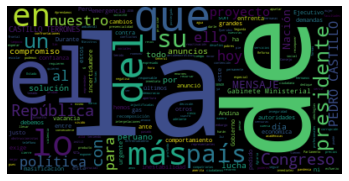

In [ ]:
# Generate a word cloud image
wc = WordCloud()
wc.generate(article.text)

# Display the generated image:
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### Generate a Customized Word Cloud Image

In [ ]:
stopwords = set(stopwords.words('spanish', 'english'))

stopwords.update(['ello', 'cinco', 'día'])

Converting an image to a numpy array results in an array containing a sequence of values that each represent an individual pixel in the image.

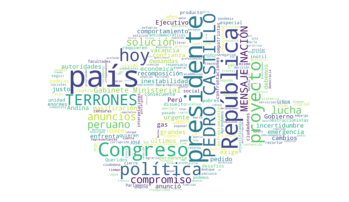

In [ ]:
mask = np.array(Image.open('repsol.jpg'))
# mask = np.array(Image.open('pedro-castillo.jpg'))

wc = WordCloud(stopwords=stopwords,
               background_color="white",
               max_words=2000,
               mask=mask,
               )

wc.generate(article.text)

# Display the generated image:
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

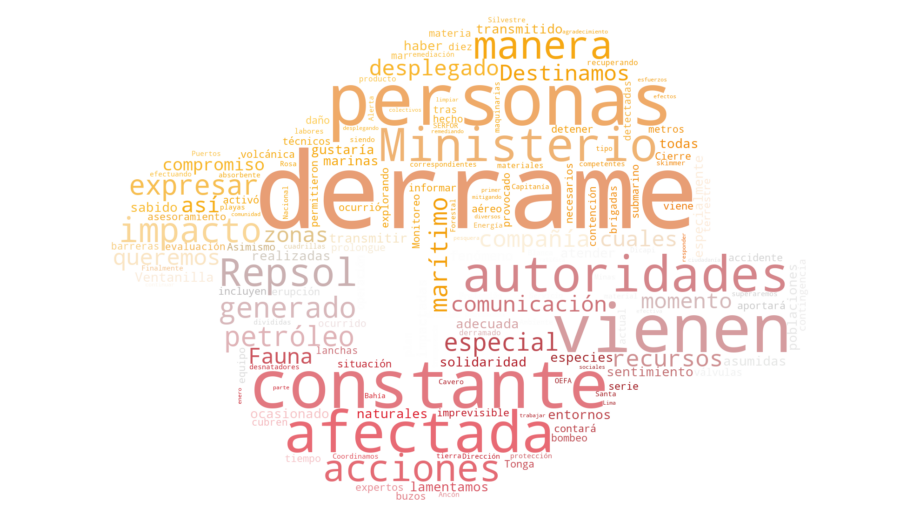

In [ ]:
mask = np.array(Image.open('repsol.jpg'))
# mask = np.array(Image.open('pedro-castillo.jpg'))

wc = WordCloud(stopwords=stopwords,
               background_color="white",
               max_words=2000,
               mask=mask,
               max_font_size=256,
            #    random_state=42,
            #    width=mask.shape[1],
            #    height=mask.shape[0]
               )

wc.generate(article.text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[16,14])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

## References:

- https://medium.com/towards-data-science/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
- https://www.repsol.pe/es/sala-prensa/notas-prensa/comunicado.cshtml